In [46]:
from hmmlearn import hmm
import numpy as np
import pandas as pd

In [18]:
%matplotlib inline
import matplotlib.pylab as plt

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [2]:
m = hmm.MultinomialHMM(n_components=3)

In [3]:
m.startprob_ = np.array([.4, .2, .4])

In [4]:
m.transmat_ = np.array([[.6, .2, .2],
                        [.3, .5, .2],
                        [.2, .1, .7]])

In [5]:
m.emissionprob_ = np.array([[0, .2, .8],
                            [.3, .7, 0],
                            [.8, .2, 0]])

In [9]:
m.decode(np.array([[1,2,0]]).T)

/opt/conda/lib/python3.6/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


(-5.092279283136766, array([0, 0, 2]))

In [10]:
clean_data = '/src/data/pdkit/GAIT_-_2018-06-14_13-50-58_-_d90b653403_-_13311.csv'

In [52]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor

In [53]:
import sklearn.cluster as cluster

In [12]:
ts = GaitTimeSeries.load_data(clean_data, format_file='gait_gyro')

Sampling rate is 499.6666666666667 Hz
Sampling rate is 499.6666666666667 Hz


In [13]:
gp = GaitProcessor(sampling_frequency=500, filter_order=8)

In [14]:
r_ts = gp.resample_signal(ts)

In [33]:
fr_ts = gp.filter_data_frame(r_ts, centre=True)

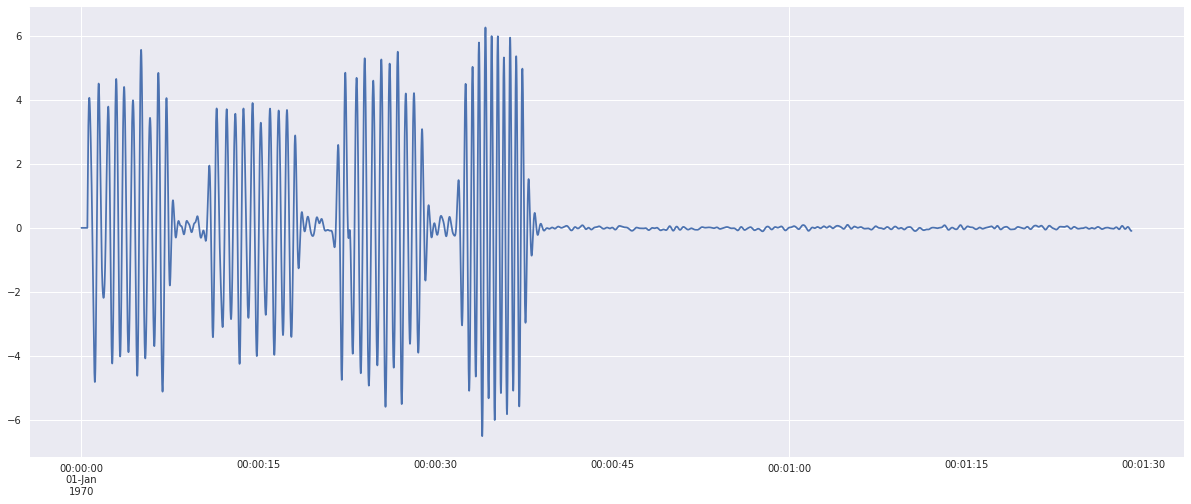

In [34]:
fr_ts.mag_sum_acc.plot()

In [35]:
import scipy.signal as sig

In [41]:
d = fr_ts.mag_sum_acc

In [42]:
pk, _ = sig.find_peaks(d)
prm = sig.peak_prominences(d, pk)[0]

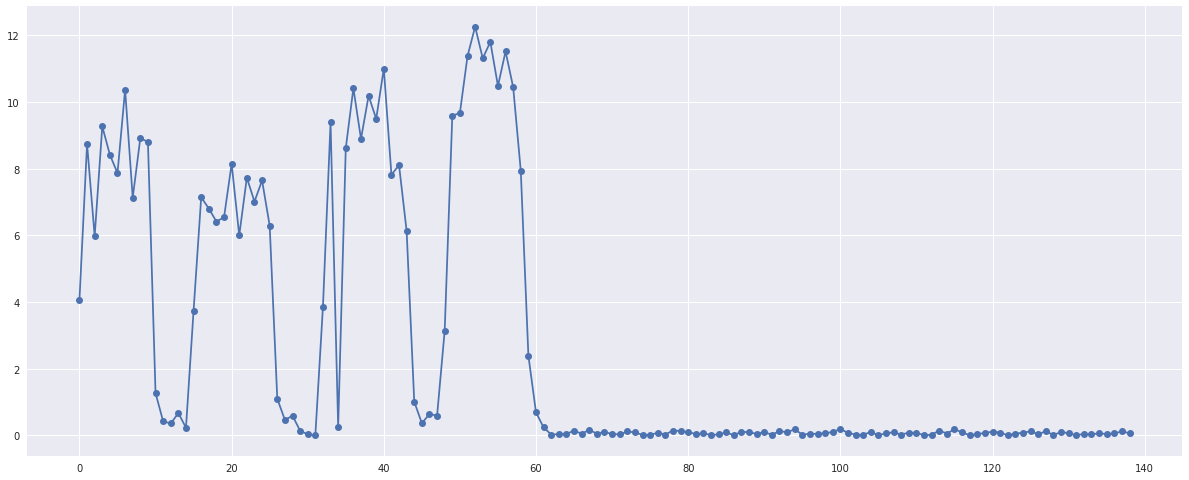

In [43]:
plt.plot(prm, 'o-')

In [47]:
pp = pd.Series(prm)

In [48]:
prm = (prm - prm.min()) / (prm.max() - prm.min())

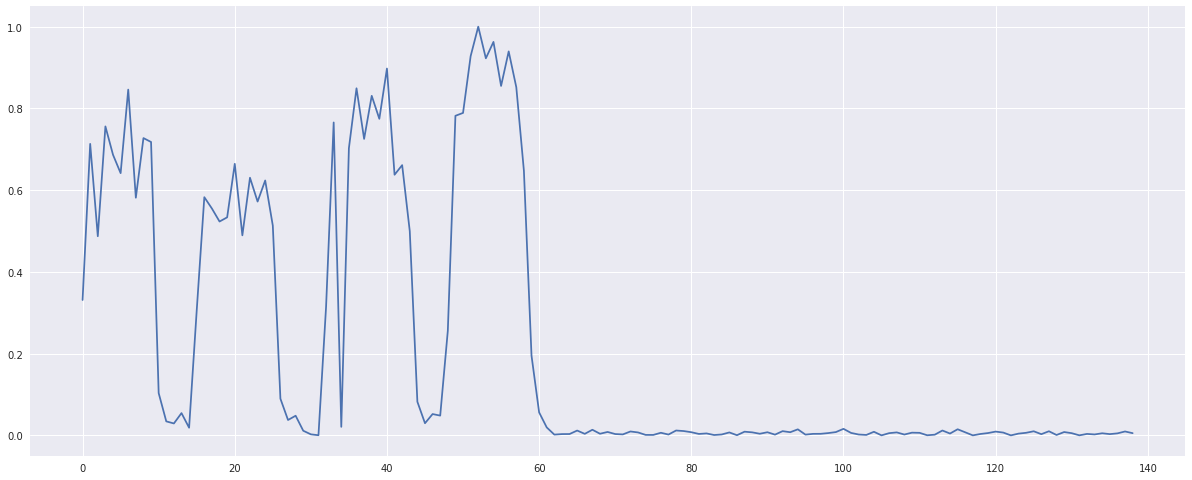

In [50]:
plt.plot(prm)

In [102]:
sc = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="rbf", gamma=0.1)

In [103]:
from tslearn.clustering import TimeSeriesKMeans

In [104]:
tskm = TimeSeriesKMeans(n_clusters=3)

In [106]:
tkm = tskm.fit_predict(prm.reshape(-1, 1))

0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 


In [108]:
tkm

array([0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [99]:
cls = sc.fit_predict(prm.reshape(-1, 1))

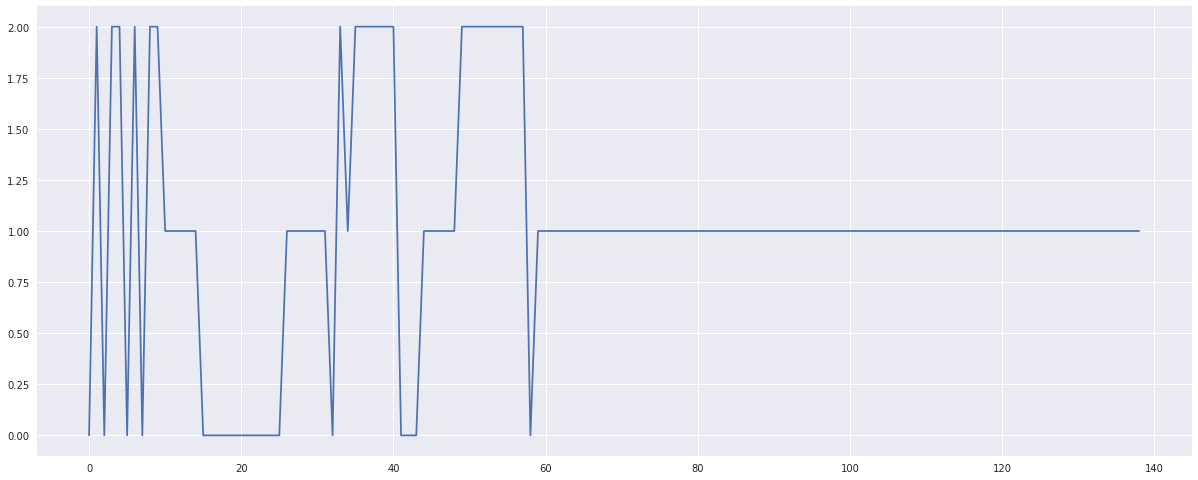

In [107]:
plt.plot(tkm)

In [101]:
!pip install tslearn

    100% |################################| 593kB 21.1MB/s 
  Running setup.py bdist_wheel for tslearn ... done
  Stored in directory: /home/monad/.cache/pip/wheels/a9/a2/35/79cb7b16cad04acd389f83368dc1a90430572d466ebb9bd422
Successfully built tslearn
